In [1]:
!pip install mplfinance

In [50]:
!pip install keras

In [52]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=3535327640f71e1eb1e6ca70489787c9cbb239546aae35e185a1fd91f05cd752
  Stored in directory: c:\users\chugh\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [54]:
!pip install ta

  Created wheel for ta: filename=ta-0.8.0-py3-none-any.whl size=28895 sha256=49850ff3c635475bb94a3742fd5dda69e83322ea6b405ccb700912418861b487
  Stored in directory: c:\users\chugh\appdata\local\pip\cache\wheels\a6\f0\22\5b8036f0825e6cab830da478c059b98aa60e44e84faf2099d0
Successfully built ta


In [140]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
from mplfinance.original_flavor import candlestick_ohlc
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from sklearn import preprocessing
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Bidirectional,LSTM,Dropout,TimeDistributed
from keras.layers import Dense,GlobalAveragePooling2D
from ta.trend import IchimokuIndicator
from sklearn.linear_model import LinearRegression
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import tensorflow as tf
import random
import keras

In [2]:
def save_tickers():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup=bs.BeautifulSoup(resp.text)
    table=soup.find('table',{'class':'wikitable sortable'})
    tickers=[]
    for row in table.findAll('tr')[1:]:
        ticker=row.findAll('td')[0].text[:-1]
        tickers.append(ticker)
    with open(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/tickers.pickle",'wb') as f:
        pickle.dump(tickers, f)
    return tickers

In [3]:
def fetch_data():
    with open(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/tickers.pickle",'rb') as f:
        tickers=pickle.load(f)
    if not os.path.exists(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master\stock_details'):
        os.makedirs(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master\stock_details")
    #count=200
    start= dt.datetime(2010,1,1)
    end=dt.datetime(2021,6,22)
    count=0
    for ticker in tickers:
        if count==200:  break
        count+=1
        print(ticker)
        try:
            df=web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/stock_details/{}.csv".format(ticker))
        except:
            print("Error")
            continue
#random pick of stock names

In [4]:
def compile():
    with open(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/tickers.pickle",'rb') as f:
        tickers=pickle.load(f)
    main_df=pd.DataFrame()
    for count,ticker in enumerate(tickers):
        if 'AMZN' in ticker: continue
        if not os.path.exists(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/stock_details/{}.csv".format(ticker)): continue
        df=pd.read_csv(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/stock_details/{}.csv".format(ticker))
        df.set_index('Date',inplace=True)
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)
        if main_df.empty:
            main_df=df
        else:
            main_df=main_df.join(df,how='outer')
    print(main_df.head())
    main_df.to_csv(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master\Dataset_temp.csv')

In [5]:
save_tickers()
fetch_data()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK.B
Error
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF.B
Error
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EFX
EQIX
EQR
ESS
EL
ETSY
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FMC
F


In [6]:
compile()

                  MMM        ABT  ABBV  ABMD        ACN       ATVI       ADBE  \
Date                                                                            
2009-12-31  59.639797  17.536015   NaN  8.73  32.967911   9.908378  36.779999   
2010-01-04  59.892273  17.688671   NaN  8.74  33.420712  10.077830  37.090000   
2010-01-05  59.517159  17.545757   NaN  8.53  33.627262  10.095666  37.700001   
2010-01-06  60.361225  17.643198   NaN  8.40  33.984749  10.042155  37.619999   
2010-01-07  60.404507  17.789360   NaN  8.40  33.952980   9.801356  36.889999   

             AMD        AAP        AES  ...        FRT        FDX        FIS  \
Date                                    ...                                    
2009-12-31  9.68  38.754852   9.973230  ...  45.614040  75.213974  19.874439   
2010-01-04  9.70  38.659103  10.242980  ...  45.149265  75.213974  20.196630   
2010-01-05  9.71  38.429325  10.138076  ...  45.095364  76.196426  21.061472   
2010-01-06  9.57  38.764431  10.

In [7]:
#amzn
df=pd.read_csv(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master\dataset_target.csv',index_col=0)

In [8]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

Text(0, 0.5, 'Price')

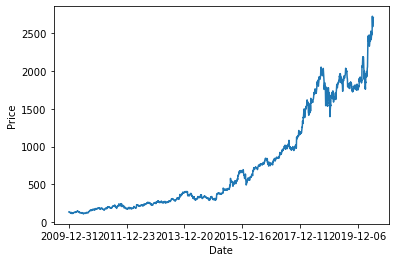

In [9]:
ax=df['High'].plot()
ax.set_ylabel("Price")


Text(0, 0.5, 'Price')

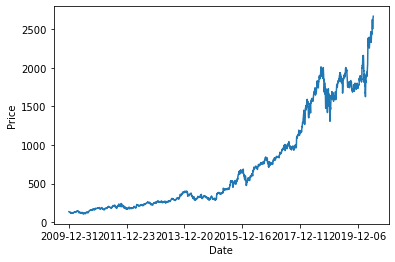

In [10]:
ax=df['Low'].plot()
ax.set_ylabel("Price")

Text(0, 0.5, 'Price')

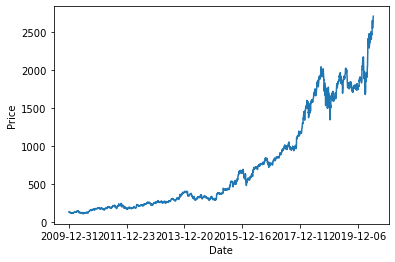

In [11]:
ax=df['Adj Close'].plot()
ax.set_ylabel("Price")

Text(0, 0.5, 'Volume(in Lakhs)')

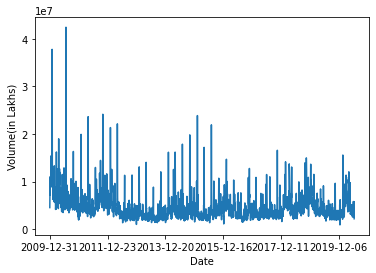

In [12]:
ax=df['Volume'].plot()
ax.set_ylabel("Volume(in Lakhs)")

In [13]:
## We are taking 50 moving average
## That is a total of 50 days data

In [14]:
df['Moving_av']= df['Adj Close'].rolling(window=50,min_periods=0).mean()

Text(0, 0.5, 'Moving Average of Price')

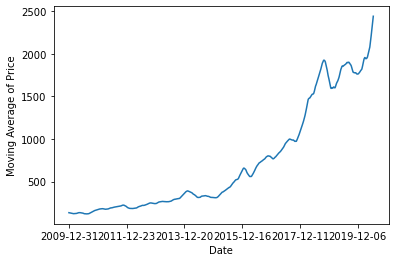

In [15]:
ax=df['Moving_av'].plot()
ax.set_ylabel("Moving Average of Price")

In [16]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]


while i<len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume']-df.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close']-df.iloc[i-1]['Adj Close'])
    i+=1
    
df['Increase_in_vol']=rate_increase_in_vol
df['Increase_in_adj_close']=rate_increase_in_adj_close   

Text(0, 0.5, 'Increase in Volume(in Lakhs)')

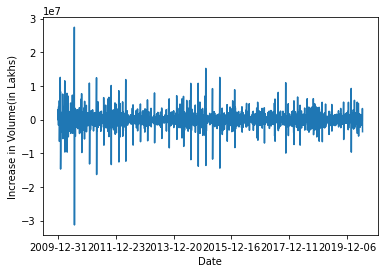

In [17]:
ax=df['Increase_in_vol'].plot() 
ax.set_ylabel("Increase in Volume(in Lakhs)")

Text(0, 0.5, 'Increase in Adj_Close Price')

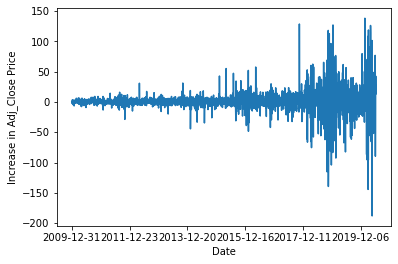

In [18]:
ax=df['Increase_in_adj_close'].plot() 
ax.set_ylabel("Increase in Adj_Close Price")

In [19]:
df.to_csv(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master\dataset_target_2.csv",index=False)

In [20]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close'],
      dtype='object')

In [21]:
df=pd.read_csv(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master\stock_details\AMZN.csv')

In [22]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [23]:
df=pd.read_csv(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master\Dataset_main.csv')

In [24]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'MMM',
       ...
       'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'Date'],
      dtype='object', length=207)

In [25]:
df=pd.read_csv(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/stock_details/AMZN.csv',index_col=0,parse_dates=True)

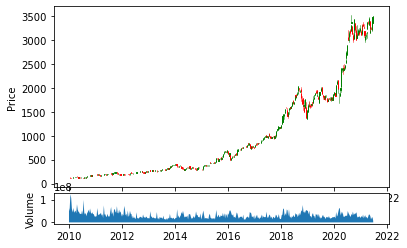

In [26]:
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)



ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax1.set_ylabel("Price")
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax2.set_ylabel("Volume")
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

In [27]:
df1=pd.read_csv(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/dataset_target.csv')
col1=df1.columns
print(col1)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [28]:
df2=pd.read_csv(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/dataset_target_2.csv')
col2=df2.columns
print(col2)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close'],
      dtype='object')


In [29]:
df3=pd.read_csv(r'C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/Dataset_main.csv')
col3=df3.columns
print(col3)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'MMM',
       ...
       'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'Date'],
      dtype='object', length=207)


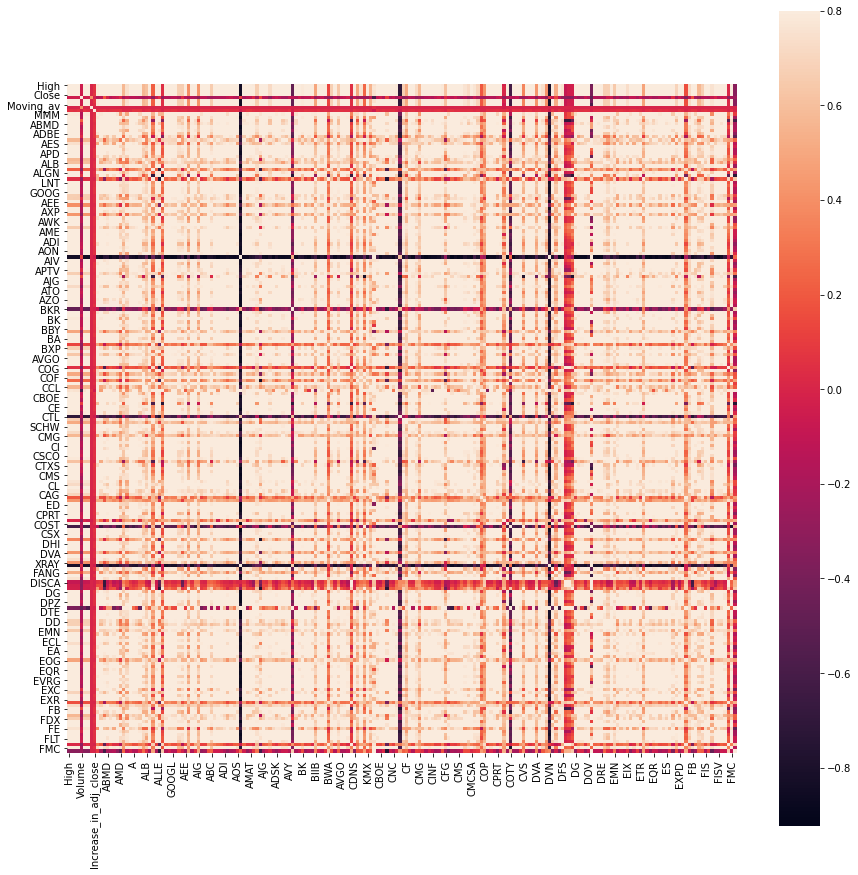

In [30]:
import seaborn as sb
C_mat = df3.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

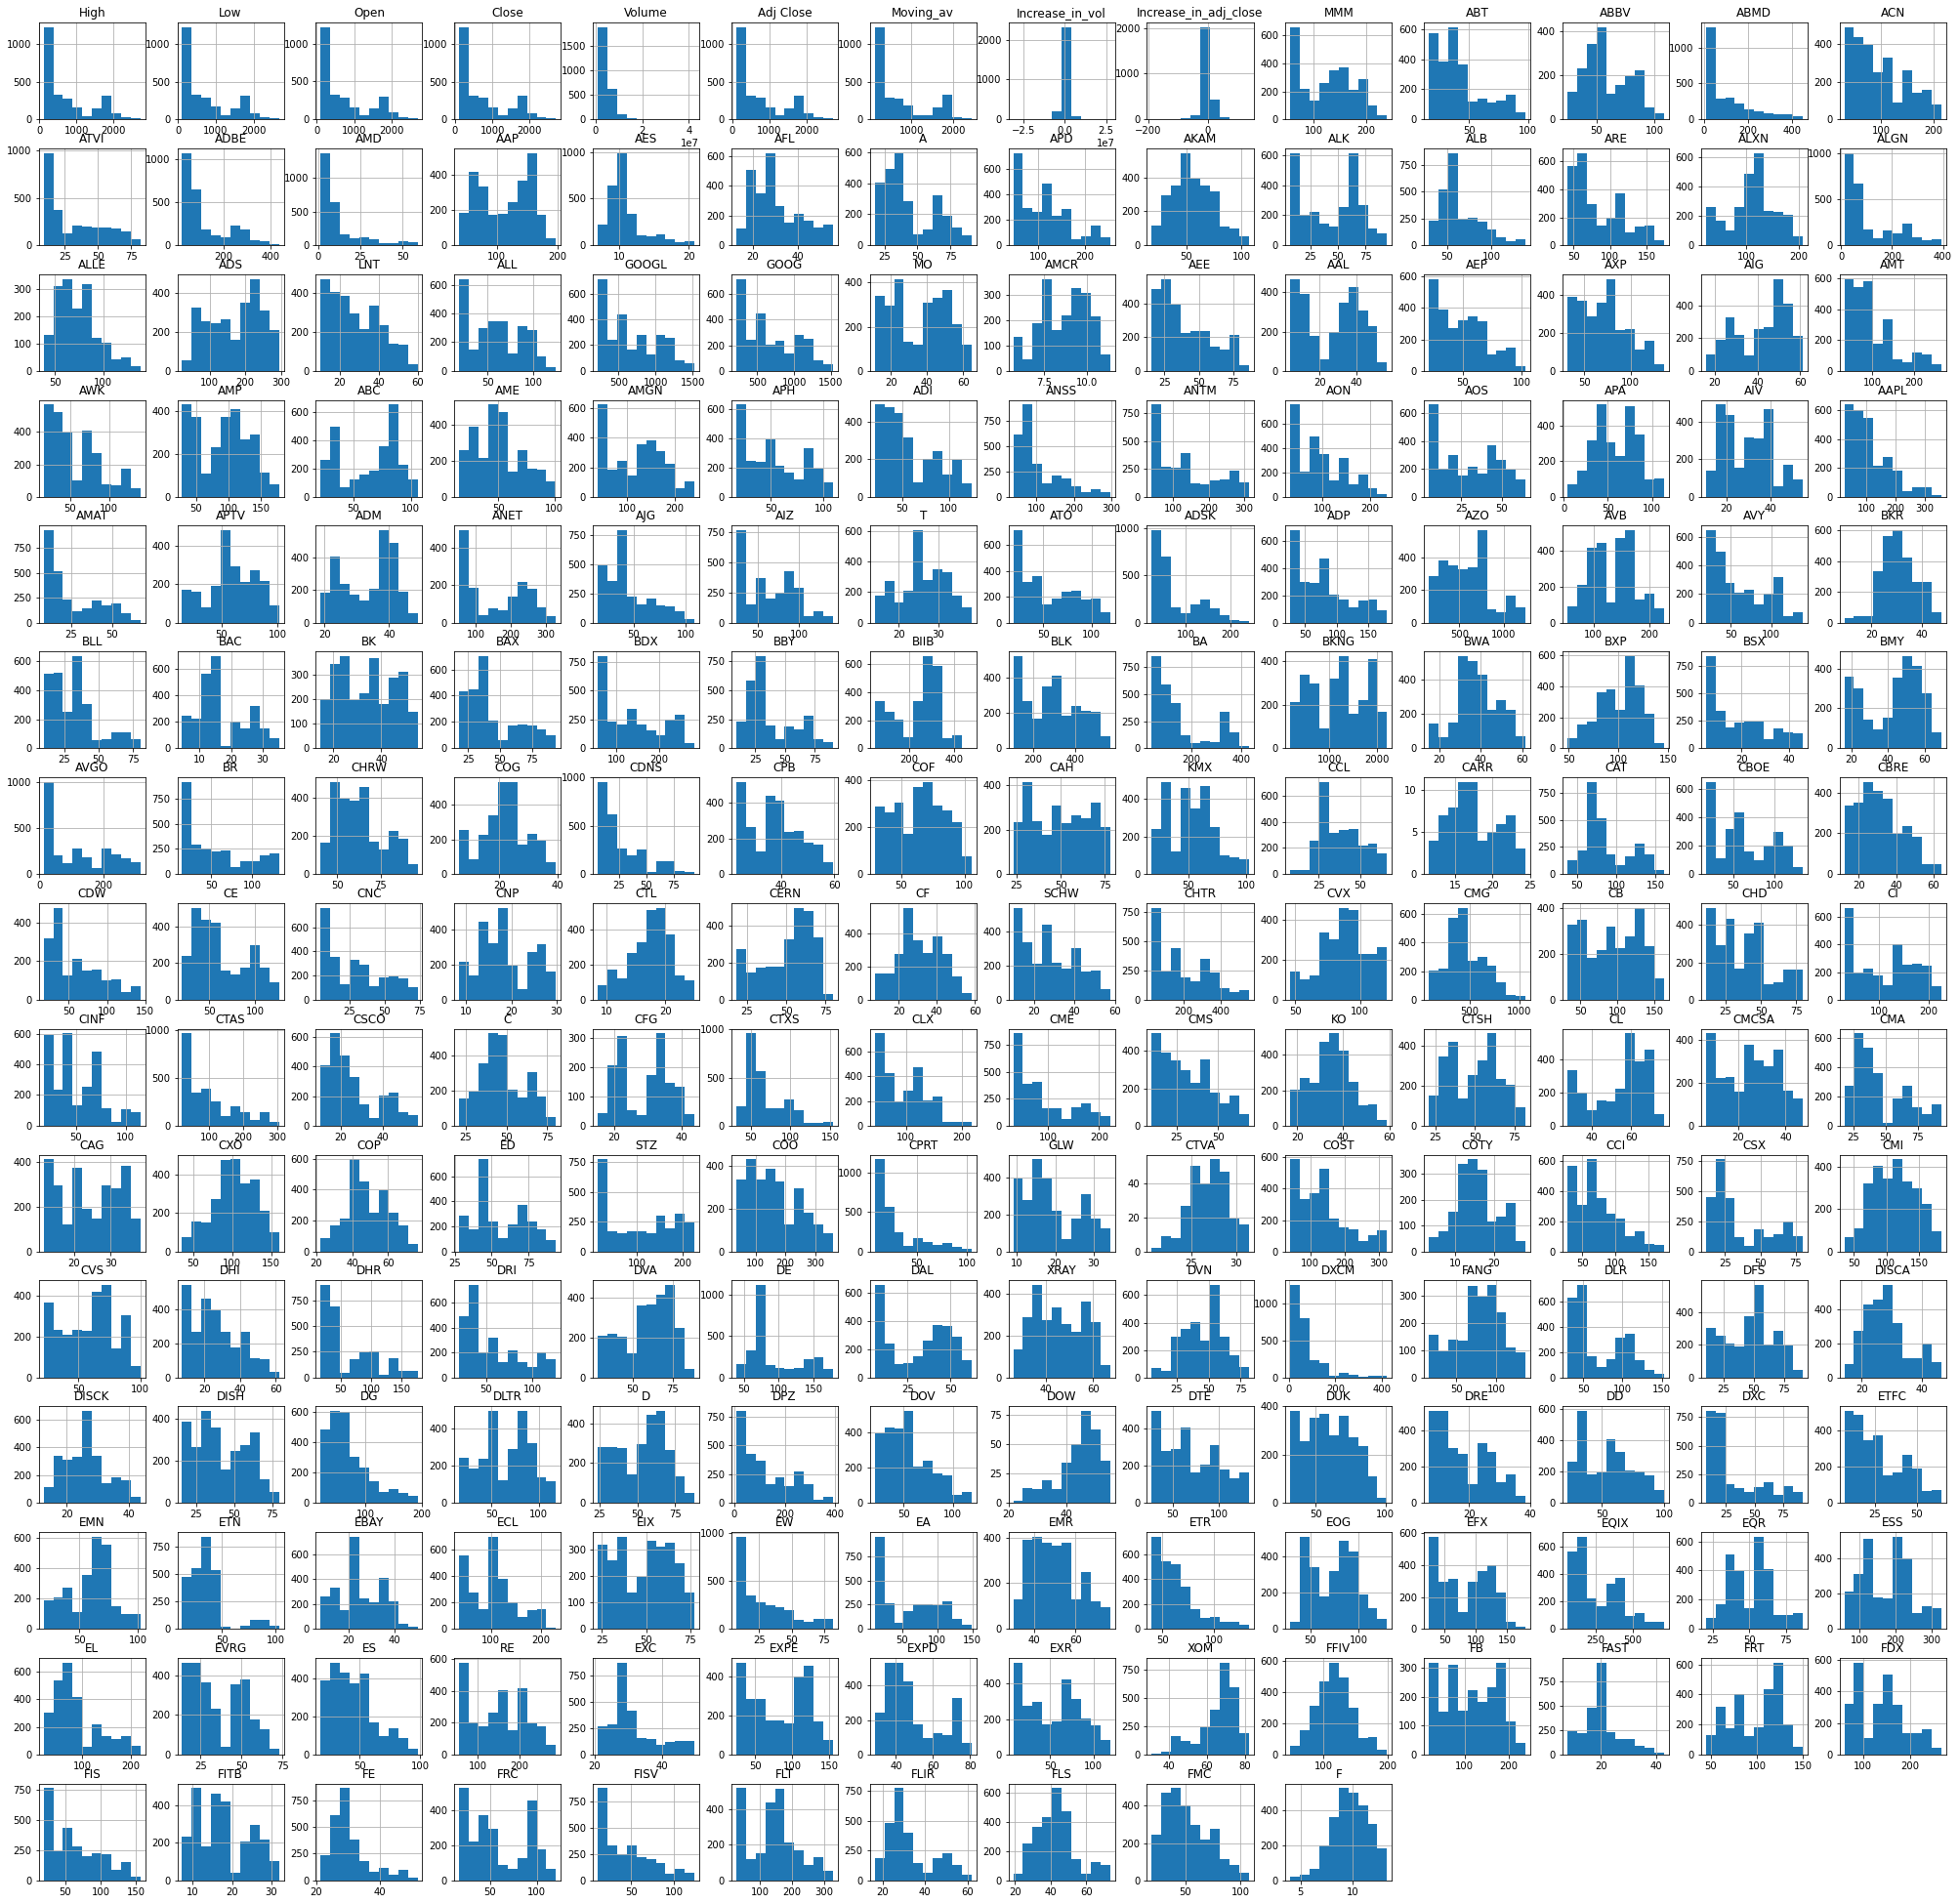

In [31]:
df3.hist(figsize = (35,35))
plt.show()

In [32]:
df3.fillna(0, inplace=True)

In [33]:
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

In [34]:
col_y=y_df.columns
print(col_y)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [35]:
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)

In [36]:
y_df_mod.columns

Index(['High', 'Low', 'Open', 'Close'], dtype='object')

In [37]:
Drop_cols=col_y

In [38]:
Drop_cols=Drop_cols.tolist()

In [39]:
Drop_cols.append('Date')

In [40]:
X_df=df3.drop(Drop_cols,axis=1)

In [41]:
X_df.columns

Index(['Moving_av', 'Increase_in_vol', 'Increase_in_adj_close', 'MMM', 'ABT',
       'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE',
       ...
       'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F'],
      dtype='object', length=200)

In [42]:
X=X_df.values
y=y_df_mod.values

In [61]:
def Implementation(ticker):
    print("Price Prediction for {}".format(ticker))
    stock = pd.read_csv(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/stock_details/{}.csv".format(ticker))
    indicator_bb = BollingerBands(close=stock["Close"],  window=20, window_dev=2)
    macd = MACD(close=stock["Close"])
    rsi = RSIIndicator(close=stock["Close"])
    ichi = IchimokuIndicator(high=stock["High"],low=stock["Low"])
    stock['macd'] = macd.macd()
    stock['rsi'] = rsi.rsi()
    stock['bb_bbm'] = indicator_bb.bollinger_mavg()
    stock['bb_bbh'] = indicator_bb.bollinger_hband()
    stock['bb_bbl'] = indicator_bb.bollinger_lband()
    stock['ichi_a'] = ichi.ichimoku_a()
    stock['ichi_b'] = ichi.ichimoku_b()
    stock['ichi_base'] = ichi.ichimoku_base_line()
    stock['ichi_conv'] = ichi.ichimoku_conversion_line()
    stock = stock.fillna(0)

    scaler = preprocessing.MinMaxScaler()
    scaled_values = scaler.fit_transform(stock.iloc[:,1:4])
    stock.iloc[:,1:4] = scaled_values

    y_scaler = preprocessing.MinMaxScaler()
    scaled_values = y_scaler.fit_transform(np.array(stock.iloc[:,4]).reshape(-1,1))
    stock.iloc[:,4] = scaled_values


    scaler = preprocessing.MinMaxScaler()
    scaled_values = scaler.fit_transform(stock.iloc[:,5:])
    stock.iloc[:,5:] = scaled_values

    Lstock = stock.drop(['Close','Date'],1)
    model = LinearRegression()
    model.fit(Lstock.iloc[:,:], stock.iloc[:,4])
    importance = model.coef_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    plt.bar([Lstock.columns[x] for x in range(len(importance))], importance)
    plt.show()
    stock_final = stock.drop(['Date','Open','Volume','macd','bb_bbm','bb_bbh','bb_bbl','ichi_a','ichi_conv'],1)

    window_size = 50
    week = 7
    X = []
    Y = []
    print(stock_final)
    for i in range(0 , len(stock) - window_size -1 , 1):
        X.append(np.array(stock_final.iloc[i:i+window_size,:]).reshape(window_size * 7,1))
        Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.3,shuffle=False)
    len_t = len(train_X)
    train_X = np.array(train_X)
    test_X = np.array(test_X)
    train_label = np.array(train_label)
    test_label = np.array(test_label)
    train_X = train_X.reshape(train_X.shape[0],7,50,1)
    test_X = test_X.reshape(test_X.shape[0],7,50,1)
    #LSTM-CNN
    model = Sequential()
    model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None,50,1))))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(200,return_sequences=True)))
    model.add(Dropout(0.25))
    model.add(Bidirectional(LSTM(200,return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=200)
    print(model.summary())
    print(model.evaluate(test_X,test_label))
    predicted  = model.predict(test_X)
    test_label[:,0] = y_scaler.inverse_transform(test_label[:,0])
    predicted = np.array(predicted[:,0]).reshape(-1,1)
    predicted = y_scaler.inverse_transform(predicted)
    #print("Accuracy: ", np.sum(np.equal(test_label[:,0],predicted))/len(test_label[:,0]))
    plt.plot(test_label[:,0], color = 'black', label = ' Stock Price')
    plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
    plt.title(' Stock Price Prediction for {} using CNN+ LSTM'.format(ticker))
    plt.xlabel('Time')
    plt.ylabel(' Stock Price')
    plt.legend()
    plt.show()
    

Price Prediction for CERN
Feature: 0, Score: 0.39769
Feature: 1, Score: 0.36483
Feature: 2, Score: -0.27003
Feature: 3, Score: -0.00612
Feature: 4, Score: 0.48101
Feature: 5, Score: 0.00623
Feature: 6, Score: 0.00625
Feature: 7, Score: 0.00603
Feature: 8, Score: 0.00983
Feature: 9, Score: 0.00166
Feature: 10, Score: -0.05534
Feature: 11, Score: 0.01710
Feature: 12, Score: 0.04256
Feature: 13, Score: 0.00116


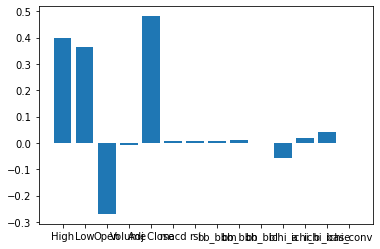

          High       Low     Close  Adj Close       rsi    ichi_b  ichi_base
0     0.038699  0.041026  0.036835   0.035975  0.000000  0.028210   0.000000
1     0.039612  0.042934  0.043864   0.042840  0.000000  0.028718   0.000000
2     0.058524  0.051481  0.062992   0.061522  0.000000  0.039244   0.000000
3     0.066553  0.067621  0.066603   0.065048  0.000000  0.043712   0.000000
4     0.064688  0.067064  0.068638   0.067036  0.000000  0.043712   0.000000
...        ...       ...       ...        ...       ...       ...        ...
2883  0.941553  0.970582  0.938544   0.942526  0.644705  0.974425   0.980401
2884  0.927093  0.964937  0.932860   0.936853  0.615773  0.974425   0.980401
2885  0.926636  0.961201  0.930862   0.934860  0.605492  0.974919   0.980401
2886  0.929680  0.958815  0.941310   0.945286  0.655760  0.974919   0.983014
2887  0.930594  0.967084  0.935011   0.939000  0.621090  0.974919   0.983014

[2888 rows x 7 columns]
Epoch 1/200
63/63 [==============================] 

63/63 [==============================] - 19s 295ms/step - loss: 7.9540e-04 - val_loss: 0.0018
Epoch 71/200
63/63 [==============================] - 19s 295ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 72/200
63/63 [==============================] - 19s 299ms/step - loss: 9.3818e-04 - val_loss: 0.0012
Epoch 73/200
63/63 [==============================] - 19s 300ms/step - loss: 7.6591e-04 - val_loss: 8.7846e-04
Epoch 74/200
63/63 [==============================] - 19s 297ms/step - loss: 7.3581e-04 - val_loss: 0.0017
Epoch 75/200
63/63 [==============================] - 19s 296ms/step - loss: 6.4173e-04 - val_loss: 0.0012
Epoch 76/200
63/63 [==============================] - 19s 297ms/step - loss: 6.2899e-04 - val_loss: 0.0013
Epoch 77/200
63/63 [==============================] - 19s 296ms/step - loss: 8.4944e-04 - val_loss: 0.0054
Epoch 78/200
63/63 [==============================] - 19s 299ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 79/200
63/63 [==============================] - 

63/63 [==============================] - 18s 294ms/step - loss: 5.0035e-04 - val_loss: 8.4737e-04
Epoch 147/200
63/63 [==============================] - 19s 294ms/step - loss: 4.7925e-04 - val_loss: 9.2828e-04
Epoch 148/200
63/63 [==============================] - 19s 299ms/step - loss: 6.4353e-04 - val_loss: 0.0023
Epoch 149/200
63/63 [==============================] - 20s 314ms/step - loss: 5.1377e-04 - val_loss: 0.0041
Epoch 150/200
63/63 [==============================] - 19s 305ms/step - loss: 9.7842e-04 - val_loss: 0.0015
Epoch 151/200
63/63 [==============================] - 19s 305ms/step - loss: 6.6296e-04 - val_loss: 0.0058
Epoch 152/200
63/63 [==============================] - 19s 304ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 153/200
63/63 [==============================] - 19s 295ms/step - loss: 5.0265e-04 - val_loss: 0.0030
Epoch 154/200
63/63 [==============================] - 19s 295ms/step - loss: 7.6313e-04 - val_loss: 0.0021
Epoch 155/200
63/63 [=================

27/27 [==============================] - 3s 96ms/step - loss: 0.0019
0.0018729274161159992


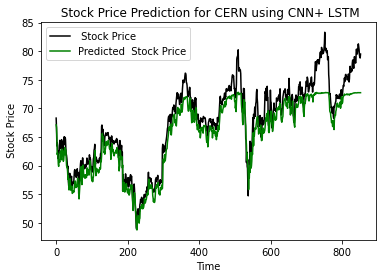

In [154]:
with open(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/tickers.pickle",'rb') as f:
        tickers=pickle.load(f)
ticker=random.choice(tickers)
Implementation(ticker)

In [152]:
 #LSTM
def Implement(ticker):
    print("Price Prediction for {}".format(ticker))
    stock = pd.read_csv(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/stock_details/{}.csv".format(ticker))
    indicator_bb = BollingerBands(close=stock["Close"],  window=20, window_dev=2)
    macd = MACD(close=stock["Close"])
    rsi = RSIIndicator(close=stock["Close"])
    ichi = IchimokuIndicator(high=stock["High"],low=stock["Low"])
    stock['macd'] = macd.macd()
    stock['rsi'] = rsi.rsi()
    stock['bb_bbm'] = indicator_bb.bollinger_mavg()
    stock['bb_bbh'] = indicator_bb.bollinger_hband()
    stock['bb_bbl'] = indicator_bb.bollinger_lband()
    stock['ichi_a'] = ichi.ichimoku_a()
    stock['ichi_b'] = ichi.ichimoku_b()
    stock['ichi_base'] = ichi.ichimoku_base_line()
    stock['ichi_conv'] = ichi.ichimoku_conversion_line()
    stock = stock.fillna(0)

    scaler = preprocessing.MinMaxScaler()
    scaled_values = scaler.fit_transform(stock.iloc[:,1:4])
    stock.iloc[:,1:4] = scaled_values

    y_scaler = preprocessing.MinMaxScaler()
    scaled_values = y_scaler.fit_transform(np.array(stock.iloc[:,4]).reshape(-1,1))
    stock.iloc[:,4] = scaled_values


    scaler = preprocessing.MinMaxScaler()
    scaled_values = scaler.fit_transform(stock.iloc[:,5:])
    stock.iloc[:,5:] = scaled_values

    Lstock = stock.drop(['Close','Date'],1)
    model = LinearRegression()
    model.fit(Lstock.iloc[:,:], stock.iloc[:,4])
    importance = model.coef_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    plt.bar([Lstock.columns[x] for x in range(len(importance))], importance)
    plt.show()
    stock_final = stock.drop(['Date','Open','Volume','macd','bb_bbm','bb_bbh','bb_bbl','ichi_a','ichi_conv'],1)

    window_size = 50
    week = 7
    X = []
    Y = []
    print(stock_final)
    for i in range(0 , len(stock) - window_size -1 , 1):
        X.append(np.array(stock_final.iloc[i:i+window_size,:]).reshape(window_size * 7,1))
        Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.3,shuffle=False)
    len_t = len(train_X)
    train_X = np.array(train_X)
    test_X = np.array(test_X)
    train_label = np.array(train_label)
    test_label = np.array(test_label)
    train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0],test_X.shape[1], 1)
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(350,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=200)
    print(model.summary())
    print(model.evaluate(test_X,test_label))
    predicted  = model.predict(test_X)
    test_label[:,0] = y_scaler.inverse_transform(test_label[:,0])
    predicted = np.array(predicted[:,0]).reshape(-1,1)
    predicted = y_scaler.inverse_transform(predicted)
    #print("Accuracy: ", np.sum(np.equal(test_label[:,0],predicted))/len(test_label[:,0]))
    plt.plot(test_label[:,0], color = 'black', label = ' Stock Price')
    plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
    plt.title(' Stock Price Prediction for {} using LSTM'.format(ticker))
    plt.xlabel('Time')
    plt.ylabel(' Stock Price')
    plt.legend()
    plt.show()
   

Price Prediction for BAC
Feature: 0, Score: 0.69545
Feature: 1, Score: 0.71381
Feature: 2, Score: -0.50227
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.07242
Feature: 5, Score: 0.00319
Feature: 6, Score: 0.00764
Feature: 7, Score: 0.00377
Feature: 8, Score: -0.00743
Feature: 9, Score: 0.01564
Feature: 10, Score: -0.04805
Feature: 11, Score: 0.02449
Feature: 12, Score: 0.03318
Feature: 13, Score: -0.00388


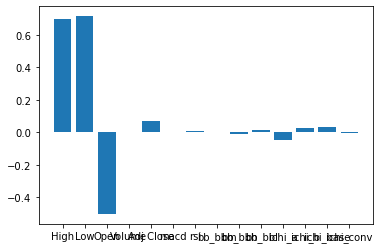

          High       Low     Close  Adj Close       rsi    ichi_b  ichi_base
0     0.261824  0.264552  0.263158   0.223658  0.000000  0.265516   0.000000
1     0.275150  0.267436  0.279613   0.237698  0.000000  0.272912   0.000000
2     0.287170  0.282643  0.292935   0.249063  0.000000  0.279582   0.000000
3     0.295793  0.291295  0.297897   0.253297  0.000000  0.284368   0.000000
4     0.312647  0.303880  0.312002   0.265331  0.000000  0.293721   0.000000
...        ...       ...       ...        ...       ...       ...        ...
2883  0.960674  0.937336  0.956902   0.957598  0.529847  1.000000   0.998695
2884  0.963679  0.912428  0.909364   0.910828  0.371395  1.000000   0.987421
2885  0.890515  0.880178  0.882722   0.884616  0.314610  1.000000   0.972825
2886  0.903057  0.894337  0.908058   0.909543  0.424871  1.000000   0.972825
2887  0.915600  0.900891  0.913804   0.915196  0.447411  1.000000   0.972825

[2888 rows x 7 columns]
Epoch 1/200
63/63 [==============================] 

63/63 [==============================] - 29s 467ms/step - loss: 1.0101e-04 - val_loss: 8.3625e-04
Epoch 68/200
63/63 [==============================] - 29s 468ms/step - loss: 7.7668e-05 - val_loss: 0.0012
Epoch 69/200
63/63 [==============================] - 30s 471ms/step - loss: 1.2413e-04 - val_loss: 6.1203e-04
Epoch 70/200
63/63 [==============================] - 41s 653ms/step - loss: 8.2409e-05 - val_loss: 0.0011
Epoch 71/200
63/63 [==============================] - 56s 887ms/step - loss: 8.1427e-05 - val_loss: 7.7639e-04
Epoch 72/200
63/63 [==============================] - 68s 1s/step - loss: 7.4487e-05 - val_loss: 9.6358e-04
Epoch 73/200
63/63 [==============================] - 45s 701ms/step - loss: 7.3497e-05 - val_loss: 0.0015
Epoch 74/200
63/63 [==============================] - 30s 471ms/step - loss: 9.0452e-05 - val_loss: 6.8552e-04
Epoch 75/200
63/63 [==============================] - 30s 469ms/step - loss: 8.3317e-05 - val_loss: 6.4328e-04
Epoch 76/200
63/63 [=========

Epoch 141/200
63/63 [==============================] - 51s 822ms/step - loss: 9.7758e-05 - val_loss: 0.0013
Epoch 142/200
63/63 [==============================] - 37s 591ms/step - loss: 8.6211e-05 - val_loss: 0.0062
Epoch 143/200
63/63 [==============================] - 42s 675ms/step - loss: 2.8562e-04 - val_loss: 6.8338e-04
Epoch 144/200
63/63 [==============================] - 41s 659ms/step - loss: 9.2228e-05 - val_loss: 3.6160e-04
Epoch 145/200
63/63 [==============================] - 64s 1s/step - loss: 6.1382e-05 - val_loss: 3.0008e-04
Epoch 146/200
63/63 [==============================] - 57s 914ms/step - loss: 5.9333e-05 - val_loss: 2.9809e-04
Epoch 147/200
63/63 [==============================] - 62s 1s/step - loss: 6.0785e-05 - val_loss: 4.3072e-04
Epoch 148/200
63/63 [==============================] - 52s 836ms/step - loss: 7.1309e-05 - val_loss: 3.4131e-04
Epoch 149/200
63/63 [==============================] - 29s 467ms/step - loss: 6.5162e-05 - val_loss: 2.8163e-04
Epoch 

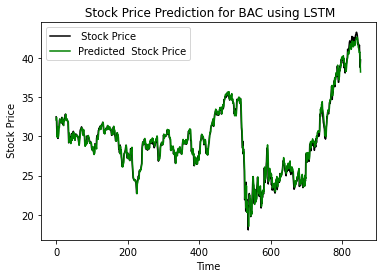

Price Prediction for BAC
Feature: 0, Score: 0.69545
Feature: 1, Score: 0.71381
Feature: 2, Score: -0.50227
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.07242
Feature: 5, Score: 0.00319
Feature: 6, Score: 0.00764
Feature: 7, Score: 0.00377
Feature: 8, Score: -0.00743
Feature: 9, Score: 0.01564
Feature: 10, Score: -0.04805
Feature: 11, Score: 0.02449
Feature: 12, Score: 0.03318
Feature: 13, Score: -0.00388


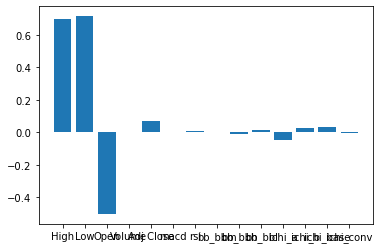

          High       Low     Close  Adj Close       rsi    ichi_b  ichi_base
0     0.261824  0.264552  0.263158   0.223658  0.000000  0.265516   0.000000
1     0.275150  0.267436  0.279613   0.237698  0.000000  0.272912   0.000000
2     0.287170  0.282643  0.292935   0.249063  0.000000  0.279582   0.000000
3     0.295793  0.291295  0.297897   0.253297  0.000000  0.284368   0.000000
4     0.312647  0.303880  0.312002   0.265331  0.000000  0.293721   0.000000
...        ...       ...       ...        ...       ...       ...        ...
2883  0.960674  0.937336  0.956902   0.957598  0.529847  1.000000   0.998695
2884  0.963679  0.912428  0.909364   0.910828  0.371395  1.000000   0.987421
2885  0.890515  0.880178  0.882722   0.884616  0.314610  1.000000   0.972825
2886  0.903057  0.894337  0.908058   0.909543  0.424871  1.000000   0.972825
2887  0.915600  0.900891  0.913804   0.915196  0.447411  1.000000   0.972825

[2888 rows x 7 columns]


ValueError: cannot reshape array of size 694750 into shape (1985,1)

In [134]:
Implement(ticker)

In [148]:
def Implement_1(ticker):
    print("Price Prediction for {}".format(ticker))
    stock = pd.read_csv(r"C:\Users\chugh\Downloads\Stock_prediction_hybrid_model-master\Stock_prediction_hybrid_model-master/stock_details/{}.csv".format(ticker))
    indicator_bb = BollingerBands(close=stock["Close"],  window=20, window_dev=2)
    macd = MACD(close=stock["Close"])
    rsi = RSIIndicator(close=stock["Close"])
    ichi = IchimokuIndicator(high=stock["High"],low=stock["Low"])
    stock['macd'] = macd.macd()
    stock['rsi'] = rsi.rsi()
    stock['bb_bbm'] = indicator_bb.bollinger_mavg()
    stock['bb_bbh'] = indicator_bb.bollinger_hband()
    stock['bb_bbl'] = indicator_bb.bollinger_lband()
    stock['ichi_a'] = ichi.ichimoku_a()
    stock['ichi_b'] = ichi.ichimoku_b()
    stock['ichi_base'] = ichi.ichimoku_base_line()
    stock['ichi_conv'] = ichi.ichimoku_conversion_line()
    stock = stock.fillna(0)

    scaler = preprocessing.MinMaxScaler()
    scaled_values = scaler.fit_transform(stock.iloc[:,1:4])
    stock.iloc[:,1:4] = scaled_values

    y_scaler = preprocessing.MinMaxScaler()
    scaled_values = y_scaler.fit_transform(np.array(stock.iloc[:,4]).reshape(-1,1))
    stock.iloc[:,4] = scaled_values


    scaler = preprocessing.MinMaxScaler()
    scaled_values = scaler.fit_transform(stock.iloc[:,5:])
    stock.iloc[:,5:] = scaled_values

    Lstock = stock.drop(['Close','Date'],1)
    model = LinearRegression()
    model.fit(Lstock.iloc[:,:], stock.iloc[:,4])
    importance = model.coef_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    plt.bar([Lstock.columns[x] for x in range(len(importance))], importance)
    plt.show()
    stock_final = stock.drop(['Date','Open','Volume','macd','bb_bbm','bb_bbh','bb_bbl','ichi_a','ichi_conv'],1)

    window_size = 50
    week = 7
    X = []
    Y = []
    print(stock_final)
    for i in range(0 , len(stock) - window_size -1 , 1):
        X.append(np.array(stock_final.iloc[i:i+window_size,:]).reshape(window_size * 7,1))
        Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.3,shuffle=False)
    len_t = len(train_X)
    train_X = np.array(train_X)
    test_X = np.array(test_X)
    train_label = np.array(train_label)
    test_label = np.array(test_label)
    train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0],test_X.shape[1], 1)
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[350, 1]))
    for dilation_rate in (1, 2, 4, 8, 16, 32):
        model.add(keras.layers.Conv1D(filters=32,
                              kernel_size=2,
                              strides=1,
                              dilation_rate=dilation_rate,
                              padding="causal",
                              activation="relu")
        )

    model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
    lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 30))


    model.compile(loss=keras.losses.Huber(),
                  optimizer='adam',
                  metrics=["mae"])

    model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=200)
    print(model.summary())
    print(model.evaluate(test_X,test_label))
    predicted  = model.predict(test_X)
    test_label[:,0] = y_scaler.inverse_transform(test_label[:,0])
    predicted = np.array(predicted[:,0]).reshape(-1,1)
    predicted = y_scaler.inverse_transform(predicted)
    #print("Accuracy: ", np.sum(np.equal(test_label[:,0],predicted))/len(test_label[:,0]))
    plt.plot(test_label[:,0], color = 'black', label = ' Stock Price')
    plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
    plt.title(' Stock Price Prediction for {} using CNN'.format(ticker))
    plt.xlabel('Time')
    plt.ylabel(' Stock Price')
    plt.legend()
    plt.show()

Price Prediction for BAC
Feature: 0, Score: 0.69545
Feature: 1, Score: 0.71381
Feature: 2, Score: -0.50227
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.07242
Feature: 5, Score: 0.00319
Feature: 6, Score: 0.00764
Feature: 7, Score: 0.00377
Feature: 8, Score: -0.00743
Feature: 9, Score: 0.01564
Feature: 10, Score: -0.04805
Feature: 11, Score: 0.02449
Feature: 12, Score: 0.03318
Feature: 13, Score: -0.00388


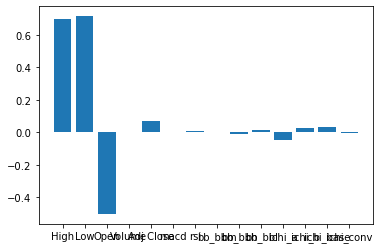

          High       Low     Close  Adj Close       rsi    ichi_b  ichi_base
0     0.261824  0.264552  0.263158   0.223658  0.000000  0.265516   0.000000
1     0.275150  0.267436  0.279613   0.237698  0.000000  0.272912   0.000000
2     0.287170  0.282643  0.292935   0.249063  0.000000  0.279582   0.000000
3     0.295793  0.291295  0.297897   0.253297  0.000000  0.284368   0.000000
4     0.312647  0.303880  0.312002   0.265331  0.000000  0.293721   0.000000
...        ...       ...       ...        ...       ...       ...        ...
2883  0.960674  0.937336  0.956902   0.957598  0.529847  1.000000   0.998695
2884  0.963679  0.912428  0.909364   0.910828  0.371395  1.000000   0.987421
2885  0.890515  0.880178  0.882722   0.884616  0.314610  1.000000   0.972825
2886  0.903057  0.894337  0.908058   0.909543  0.424871  1.000000   0.972825
2887  0.915600  0.900891  0.913804   0.915196  0.447411  1.000000   0.972825

[2888 rows x 7 columns]
Epoch 1/200
63/63 [==============================] 

Epoch 54/200
63/63 [==============================] - 4s 57ms/step - loss: 5.8147e-04 - mae: 0.0254 - val_loss: 0.0041 - val_mae: 0.0659
Epoch 55/200
63/63 [==============================] - 4s 59ms/step - loss: 6.0461e-04 - mae: 0.0260 - val_loss: 0.0036 - val_mae: 0.0623
Epoch 56/200
63/63 [==============================] - 4s 59ms/step - loss: 5.7426e-04 - mae: 0.0251 - val_loss: 0.0033 - val_mae: 0.0576
Epoch 57/200
63/63 [==============================] - 4s 58ms/step - loss: 5.8079e-04 - mae: 0.0255 - val_loss: 0.0034 - val_mae: 0.0589
Epoch 58/200
63/63 [==============================] - 4s 58ms/step - loss: 5.7243e-04 - mae: 0.0251 - val_loss: 0.0033 - val_mae: 0.0577
Epoch 59/200
63/63 [==============================] - 4s 59ms/step - loss: 5.8778e-04 - mae: 0.0256 - val_loss: 0.0034 - val_mae: 0.0577
Epoch 60/200
63/63 [==============================] - 4s 58ms/step - loss: 6.2467e-04 - mae: 0.0265 - val_loss: 0.0045 - val_mae: 0.0743
Epoch 61/200
63/63 [=====================

63/63 [==============================] - 7s 113ms/step - loss: 5.3147e-04 - mae: 0.0243 - val_loss: 0.0036 - val_mae: 0.0623
Epoch 111/200
63/63 [==============================] - 10s 152ms/step - loss: 5.9503e-04 - mae: 0.0255 - val_loss: 0.0036 - val_mae: 0.0601
Epoch 112/200
63/63 [==============================] - 6s 91ms/step - loss: 5.1086e-04 - mae: 0.0239 - val_loss: 0.0039 - val_mae: 0.0613
Epoch 113/200
63/63 [==============================] - 9s 146ms/step - loss: 5.3201e-04 - mae: 0.0244 - val_loss: 0.0038 - val_mae: 0.0603
Epoch 114/200
63/63 [==============================] - 6s 99ms/step - loss: 5.5908e-04 - mae: 0.0250 - val_loss: 0.0042 - val_mae: 0.0642 - loss: 5.5749e-04 - mae:
Epoch 115/200
63/63 [==============================] - 9s 145ms/step - loss: 5.2921e-04 - mae: 0.0242 - val_loss: 0.0049 - val_mae: 0.0701
Epoch 116/200
63/63 [==============================] - 6s 95ms/step - loss: 5.1962e-04 - mae: 0.0241 - val_loss: 0.0062 - val_mae: 0.0829
Epoch 117/200
63/

63/63 [==============================] - 5s 73ms/step - loss: 4.7928e-04 - mae: 0.0231 - val_loss: 0.0044 - val_mae: 0.0687203e-04 - mae: 0 - ETA: 0s - loss: 4.7629e-04
Epoch 167/200
63/63 [==============================] - 4s 70ms/step - loss: 4.8745e-04 - mae: 0.0233 - val_loss: 0.0045 - val_mae: 0.0652
Epoch 168/200
63/63 [==============================] - 4s 70ms/step - loss: 5.0566e-04 - mae: 0.0237 - val_loss: 0.0045 - val_mae: 0.0663
Epoch 169/200
63/63 [==============================] - 5s 73ms/step - loss: 4.6336e-04 - mae: 0.0227 - val_loss: 0.0050 - val_mae: 0.0688
Epoch 170/200
63/63 [==============================] - 4s 69ms/step - loss: 5.0855e-04 - mae: 0.0238 - val_loss: 0.0059 - val_mae: 0.0748
Epoch 171/200
63/63 [==============================] - 4s 69ms/step - loss: 4.7272e-04 - mae: 0.0231 - val_loss: 0.0056 - val_mae: 0.0722
Epoch 172/200
63/63 [==============================] - 5s 86ms/step - loss: 4.7848e-04 - mae: 0.0230 - val_loss: 0.0057 - val_mae: 0.0728
Epo

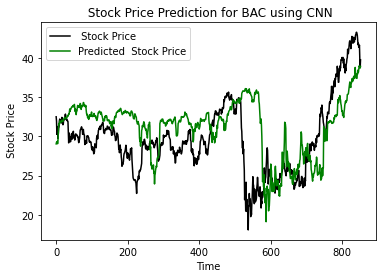

In [149]:
Implement_1(ticker)